In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


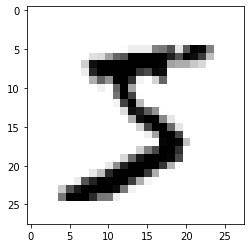

In [ ]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
def getModel(activation):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128))
  model.add(Activation(activation))
  model.add(Dense(128))
  model.add(Activation(activation))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

def trainModel(model):
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model.fit(
    X_train,
    y_train,
    epochs=2,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
  )
  return model

def getTestAccuracy(model):
  return "Accuracy: " + str(model.evaluate(X_test, y_test)[1])

print(getTestAccuracy(trainModel(getModel('relu'))))
print(getTestAccuracy(trainModel(getModel('tanh'))))
print(getTestAccuracy(trainModel(getModel('sigmoid'))))

Epoch 1/2
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4880 - accuracy: 0.8612 - val_loss: 0.1166 - val_accuracy: 0.9640
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9667
Accuracy: 0.96670001745224
Epoch 1/2
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4853 - accuracy: 0.8594 - val_loss: 0.1779 - val_accuracy: 0.9472
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9569
Accuracy: 0.9569000005722046
Epoch 1/2
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0035 - accuracy: 0.7262 - val_loss: 0.2344 - val_accuracy: 0.9317
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9393
Accuracy: 0.939300000667572


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()